In [ ]:
# Mount Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Data Exploration

In [ ]:
# Import pandas
import pandas as pd
url = 'advertising_data.csv'
df = pd.read_csv(url)

print(df.columns)
print(df.shape)
print(df.head())
print(df.tail())

Index(['Date', 'Brand Alias', 'Ad group alias', 'ASIN/SKU Alias',
       'Marketplace', 'Impressions', 'Clicks', 'Spend', 'Sales', 'Orders',
       'Units', 'Advertised Units sold', 'Other SKU units sold',
       'Advertised SKU Sales', 'Other SKU sales'],
      dtype='object')
(9586, 15)
           Date Brand Alias       Ad group alias ASIN/SKU Alias Marketplace  \
0  Oct 17, 2021     Brand 1  Brand 1 Ad Group 10        ASIN414     Walmart   
1  Oct 17, 2021     Brand 1  Brand 1 Ad Group 11        ASIN385     Walmart   
2  Oct 17, 2021     Brand 1  Brand 1 Ad Group 11        ASIN389     Walmart   
3  Oct 17, 2021     Brand 1  Brand 1 Ad Group 13        ASIN377     Walmart   
4  Oct 17, 2021     Brand 1  Brand 1 Ad Group 13        ASIN399     Walmart   

   Impressions  Clicks  Spend  Sales  Orders  Units  Advertised Units sold  \
0           33       0  $0.00  $0.00       0      0                      0   
1            0       0  $0.00  $0.00       0      0                      0   
2

In [ ]:
# Brief summary of the dataset to understand its structure and potential missing values
summary = df.describe(include='all')

# Checking for missing values in each column
missing_values = df.isnull().sum()

summary, missing_values


(                Date Brand Alias      Ad group alias ASIN/SKU Alias  \
 count           9586        9586                9586           9586   
 unique           122           2                  20            126   
 top     Oct 17, 2021     Brand 2  Brand 2 Ad Group 2        ASIN402   
 freq             110        5193                2182            193   
 mean             NaN         NaN                 NaN            NaN   
 std              NaN         NaN                 NaN            NaN   
 min              NaN         NaN                 NaN            NaN   
 25%              NaN         NaN                 NaN            NaN   
 50%              NaN         NaN                 NaN            NaN   
 75%              NaN         NaN                 NaN            NaN   
 max              NaN         NaN                 NaN            NaN   
 
        Marketplace    Impressions       Clicks  Spend  Sales       Orders  \
 count         9586    9586.000000  9586.000000   9586  

1. Date: There are 122 unique dates in the dataset.
2. Brand Alias: There are 2 unique brands.
3. Ad group alias: We have 20 unique ad groups.
4. ASIN/SKU Alias: There are 126 unique SKUs or product identifiers.
5. Marketplace: 3 unique marketplaces with Amazon being the most frequent.
6. Impressions: The data ranges from 0 to 698,067, indicating the number of times an advertisement was displayed.
7. Clicks: The number of clicks ranges from 0 to 1,299.
8. Spend, Sales, Advertised SKU Sales, Other SKU sales: These columns are in string format due to the dollar sign. We will need to convert them to numerical values.
9. Orders, Units, Advertised Units sold, Other SKU units sold: These columns represent quantities and are already in numerical format.

There are no missing values in any of the columns.



### 2. Data Scrubbing

In [ ]:
# Convert the 'Spend', 'Sales', 'Advertised SKU Sales', and 'Other SKU sales' columns to numerical values
def convert_to_float(value):
    return float(value.replace("$", "").replace(",", ""))

columns_to_convert = ['Spend', 'Sales', 'Advertised SKU Sales', 'Other SKU sales']

for column in columns_to_convert:
    df[column] = df[column].apply(convert_to_float)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Display the first few rows after the conversion
df.head()


<ipython-input-4-ee0ce7b16c9f>:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Brand Alias,Ad group alias,ASIN/SKU Alias,Marketplace,Impressions,Clicks,Spend,Sales,Orders,Units,Advertised Units sold,Other SKU units sold,Advertised SKU Sales,Other SKU sales
0,2021-10-17,Brand 1,Brand 1 Ad Group 10,ASIN414,Walmart,33,0,0.00,0.0,0,0,0,0,0.0,0.0
1,2021-10-17,Brand 1,Brand 1 Ad Group 11,ASIN385,Walmart,0,0,0.00,0.0,0,0,0,0,0.0,0.0
2,2021-10-17,Brand 1,Brand 1 Ad Group 11,ASIN389,Walmart,0,0,0.00,0.0,0,0,0,0,0.0,0.0
3,2021-10-17,Brand 1,Brand 1 Ad Group 13,ASIN377,Walmart,380,8,2.34,0.0,0,0,0,0,0.0,0.0
4,2021-10-17,Brand 1,Brand 1 Ad Group 13,ASIN399,Walmart,3805,7,6.68,0.0,0,0,0,0,0.0,0.0


The necessary data transformations have been applied:

Columns containing financial data have been converted to numerical values.
The 'Date' column has been converted to a datetime format.
Next, we'll proceed with exploring potential relationships in the data.

### 3. Data Exploration

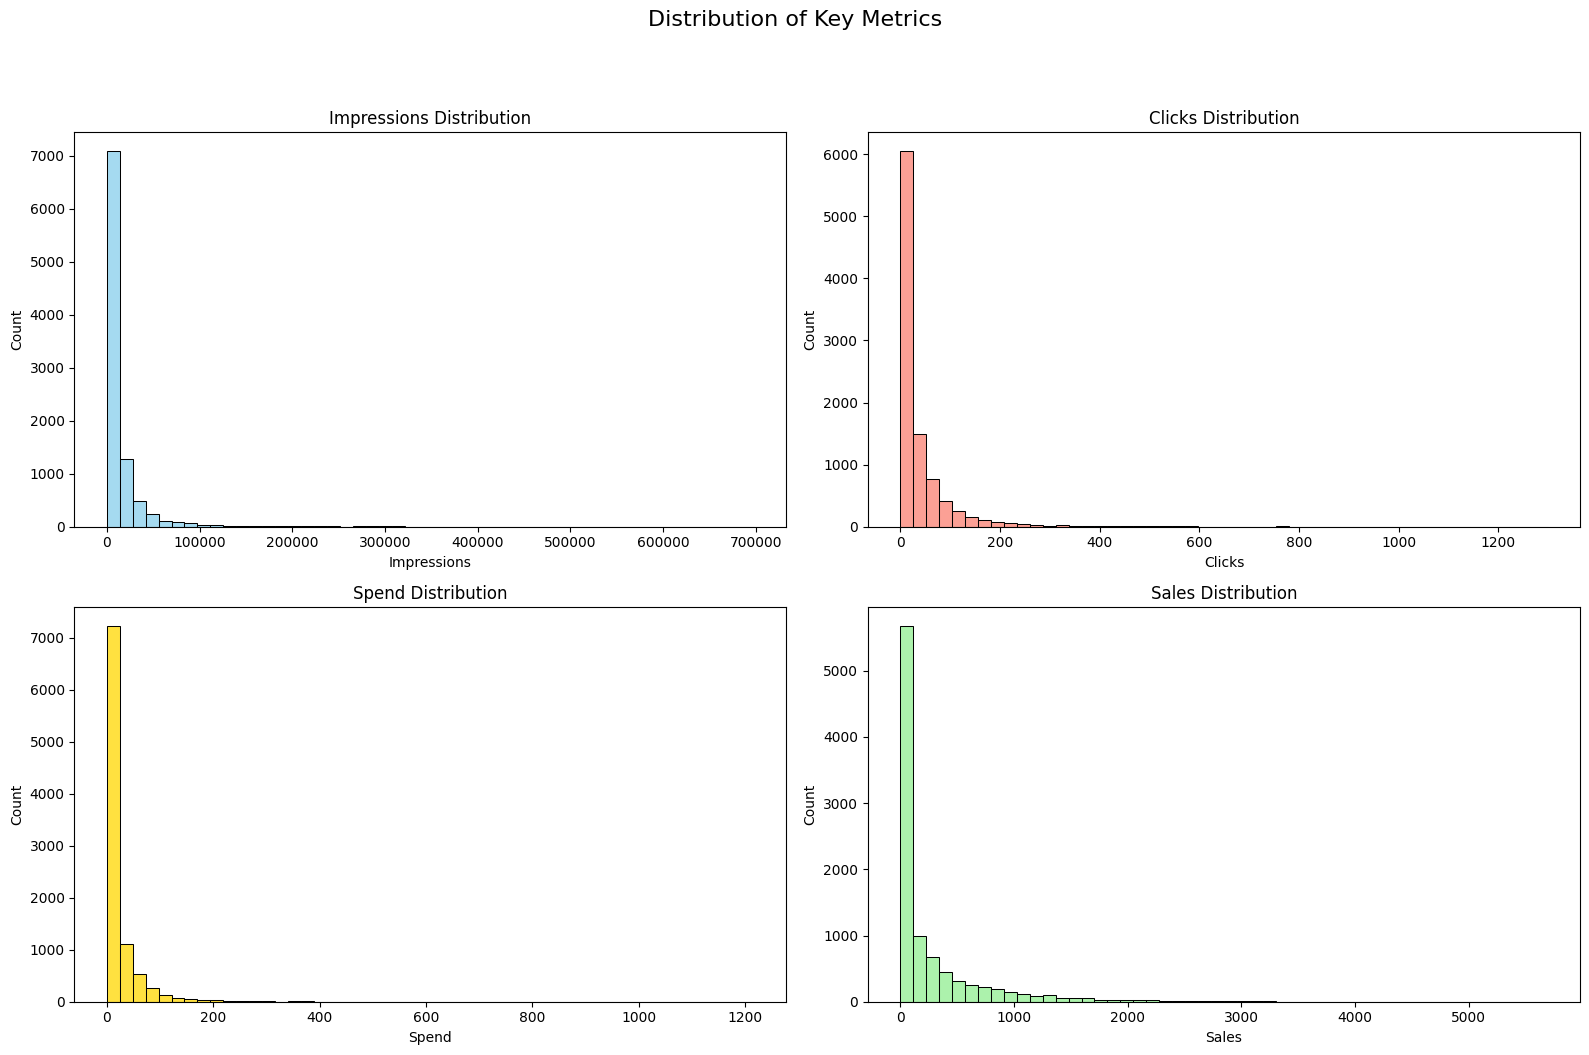

,Impressions,Clicks,Spend,Sales
Impressions,1.000000,0.851192,0.849323,0.551285
Clicks,0.851192,1.000000,0.954232,0.710275
Spend,0.849323,0.954232,1.000000,0.669397
Sales,0.551285,0.710275,0.669397,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure and axes
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle('Distribution of Key Metrics', fontsize=16, y=1.05)

# Plotting the distribution of key metrics
sns.histplot(df['Impressions'], bins=50, ax=axs[0, 0], color='skyblue').set_title('Impressions Distribution')
sns.histplot(df['Clicks'], bins=50, ax=axs[0, 1], color='salmon').set_title('Clicks Distribution')
sns.histplot(df['Spend'], bins=50, ax=axs[1, 0], color='gold').set_title('Spend Distribution')
sns.histplot(df['Sales'], bins=50, ax=axs[1, 1], color='lightgreen').set_title('Sales Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

# Correlation matrix
correlation_matrix = df[['Impressions', 'Clicks', 'Spend', 'Sales']].corr()

correlation_matrix


Distribution of Key Metrics:

* Impressions: The distribution is positively skewed, with many ad campaigns having a small number of impressions.
* Clicks: This is also positively skewed, indicating that many ad campaigns have a few clicks.
* Spend: The spend distribution reveals that a significant number of ad campaigns have low or zero spend.
* Sales: The majority of ad campaigns result in low or zero sales, with a few exceptions.
Correlation Matrix:
* Impressions vs Clicks: There's a strong positive correlation (0.85), meaning that as the number of impressions increases, the number of clicks also tends to increase.
* Impressions vs Spend: There's a strong positive correlation (0.85), indicating that campaigns with more impressions generally have higher spend.
* Clicks vs Sales: There's a significant positive correlation (0.71), meaning that campaigns with more clicks tend to have higher sales.
* Spend vs Sales: The positive correlation (0.67) suggests that as the advertising spend increases, sales generally increase.

These insights help us understand the interplay between different advertising metrics and their impact on sales. With these insights in mind, we can move on to the modeling phase to quantify these relationships and make predictions.



### 4. Modelling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define independent variables (X) and dependent variable (y)
X = df[['Impressions', 'Clicks', 'Spend']]
y = df['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(118516.94492749912, 344.2629008875326, 0.5000908376110196)

Mean Squared Error (MSE): 118,516.94

Root Mean Squared Error (RMSE): 344.26

R-squared (R2): 0.50

Findings:
* The model explains about 50% of the variance in the sales data based on the advertising metrics. This is a decent start, but there may be other factors not considered in our model that influence sales.
* The RMSE of 344.26 indicates that our model's predictions, on average, are about $344.26 away from the actual sales values.

Significance
* The strong positive correlations between advertising metrics (Impressions, Clicks, Spend) and sales outcomes emphasize the significance of these metrics in predicting sales.
* The model's ability to explain 50% of the variance in sales based on these metrics underscores their importance in an e-commerce setting.

Strengths
* The model provides a clear and interpretable relationship between advertising metrics and sales.
* The model can be easily scaled and updated with new data.

Limitations
* The model currently only explains 50% of the variance in sales. Other factors not considered in our model might have a significant impact on sales.
* Linear regression assumes a linear relationship between predictors and outcome, which might not always hold true.



Our analysis provides an initial understanding of the relationship between advertising metrics and sales outcomes. While our model has its strengths, it is essential to consider its limitations when making business decisions. Future work could involve considering other factors or using more complex models to improve predictive accuracy.

### Exploring Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict sales on the testing set
rf_y_pred = rf_model.predict(X_test)

# Calculate performance metrics for the random forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

rf_mse, rf_r2


(91908.45180453788, 0.6123265142703334)

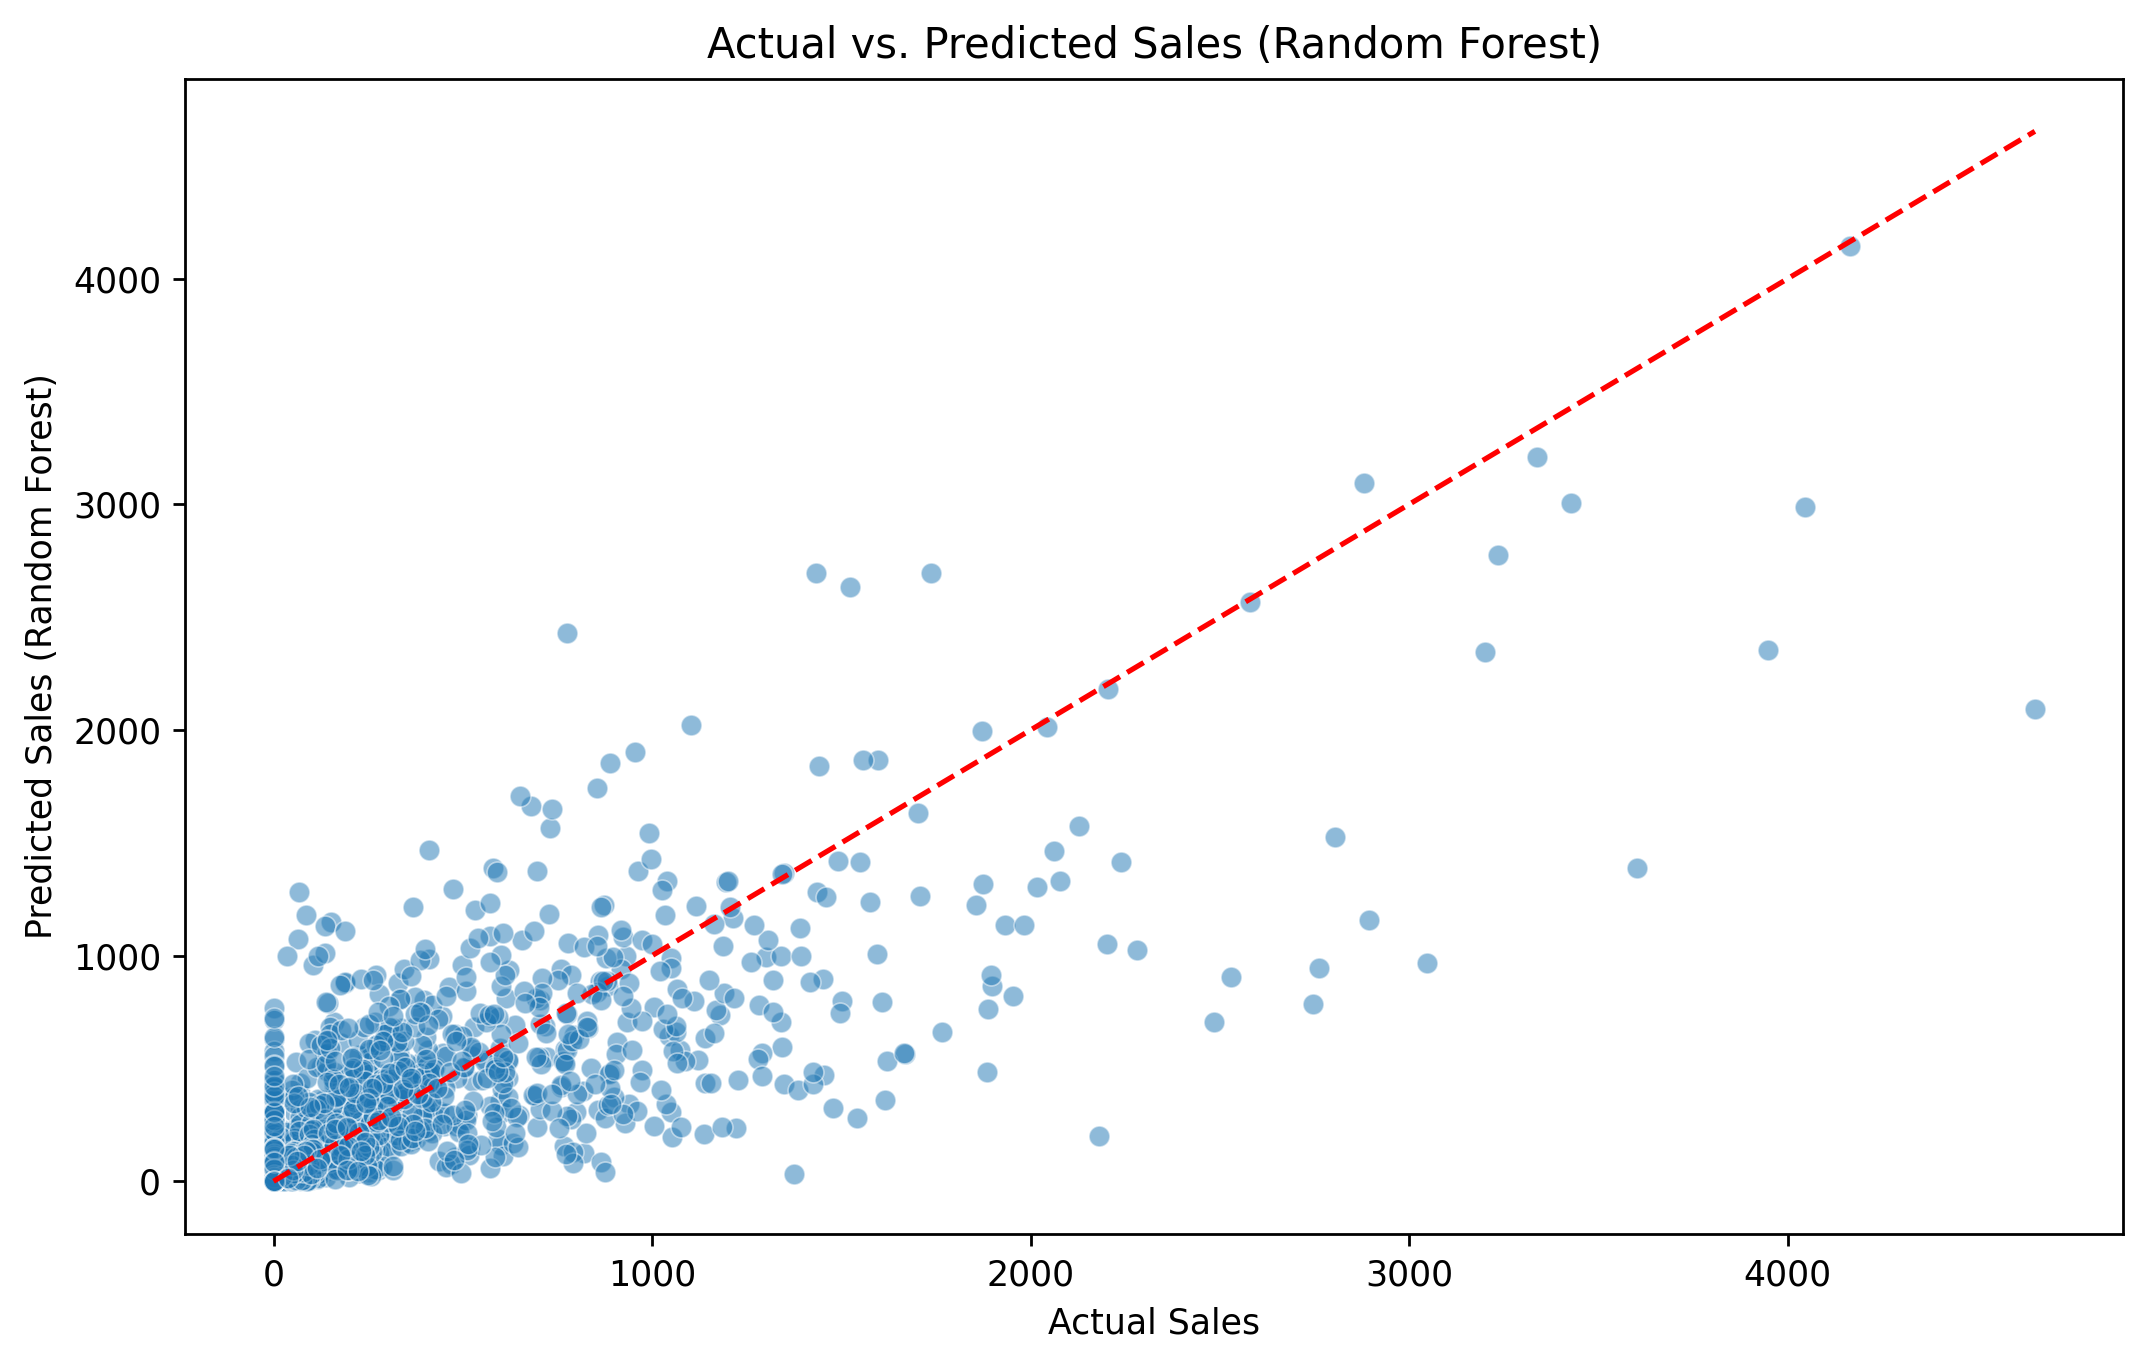

In [ ]:
# Plotting actual vs. predicted sales for the Random Forest model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rf_y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales (Random Forest)')
plt.title('Actual vs. Predicted Sales (Random Forest)')
plt.show()


The scatter plot visualizes the relationship between actual and predicted sales for the Random Forest model:

The red dashed line represents a perfect prediction, where actual sales equal predicted sales.
The scatter of points indicates the model's predictions. Points closer to the red line indicate accurate predictions, while points farther away represent discrepancies between predicted and actual values.

The Random Forest model's predictions seem to be more closely aligned with the actual values, especially for higher sales values, compared to the linear regression model. This reinforces our earlier conclusion that the Random Forest model captures the data's complexities more effectively.

### Residual plot for Linear & Random Forest

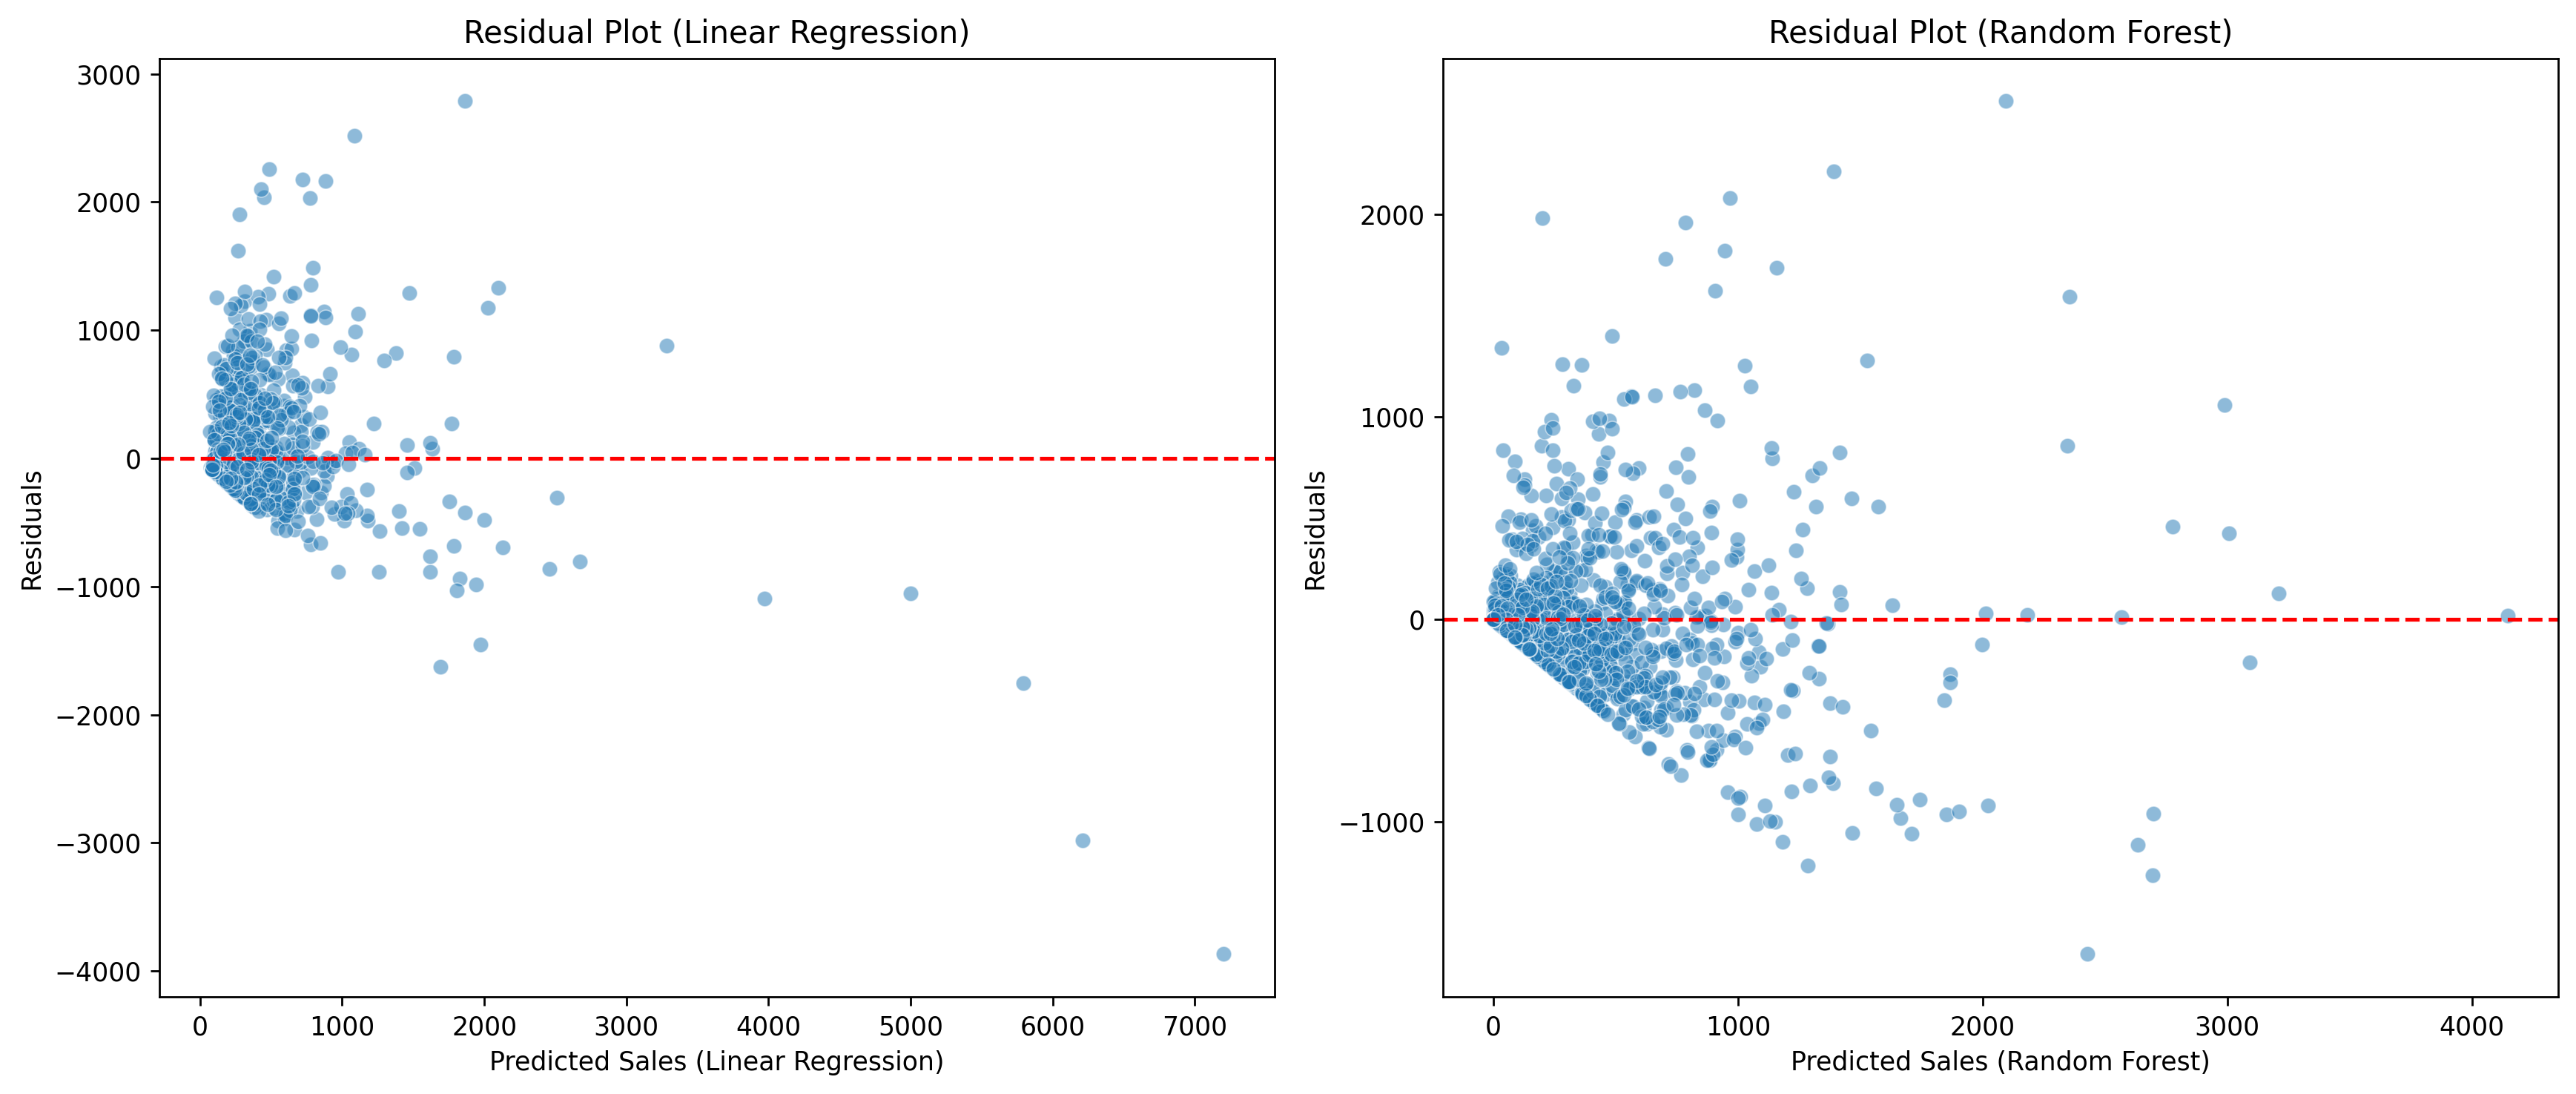

In [ ]:
# Calculate residuals for both models
linear_residuals = y_test - y_pred
rf_residuals = y_test - rf_y_pred

# Plotting residuals for both models
plt.figure(figsize=(14, 6))

# Linear Regression Residuals
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=linear_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales (Linear Regression)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Linear Regression)')

# Random Forest Residuals
plt.subplot(1, 2, 2)
sns.scatterplot(x=rf_y_pred, y=rf_residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Sales (Random Forest)')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)')

plt.tight_layout()
plt.show()


The residual plots for both the Linear Regression and Random Forest models provide insights into the discrepancies between the actual and predicted sales:

* The red dashed line at 0 represents perfect predictions. Points above this line indicate that the model under-predicted, and points below the line indicate over-prediction.
* Linear Regression Residual Plot: The residuals show a bit of a pattern, especially at higher predicted values, indicating that the model might not capture all the complexities in the data. This suggests potential non-linearity in the data or the presence of influential outliers.
* Random Forest Residual Plot: The residuals seem more randomly dispersed around the horizontal axis, especially for higher sales values, suggesting that the Random Forest model is better at capturing the underlying patterns in the data.

These plots further emphasize the superior performance of the Random Forest model in capturing the relationships in the dataset. The absence of clear patterns in the residuals of the Random Forest model indicates its better fit to the data compared to the Linear Regression model.

In [ ]:
# One-hot encode the 'Ad group alias' column
data_encoded = pd.get_dummies(df, columns=['Ad group alias'], drop_first=True)

# Selecting new set of features and target variable
new_features = ['Impressions', 'Clicks', 'Spend'] + [col for col in data_encoded.columns if 'Ad group alias_' in col]
X_new = data_encoded[new_features]

# Splitting the dataset into training and testing sets (80-20 split)
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Initialize and train the random forest regressor on the new dataset
rf_model_new = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_new.fit(X_train_new, y_train_new)

# Extracting feature importances
feature_importances = rf_model_new.feature_importances_

# Creating a DataFrame for feature importances
importances_df = pd.DataFrame({
    'Feature': new_features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

importances_df.head(10)  # Displaying the top 10 features based on importance


,Feature,Importance
2,Spend,0.646082
1,Clicks,0.174509
0,Impressions,0.126182
16,Ad group alias_Brand 2 Ad Group 1,0.022913
17,Ad group alias_Brand 2 Ad Group 2,0.009606
8,Ad group alias_Brand 1 Ad Group 2,0.005976
10,Ad group alias_Brand 1 Ad Group 4,0.004560
19,Ad group alias_Brand 2 Ad Group 4,0.004215
18,Ad group alias_Brand 2 Ad Group 3,0.002184
4,Ad group alias_Brand 1 Ad Group 11,0.001721


Based on the feature importances from the Random Forest model that includes the "Ad group alias" as a feature:

The most influential features in predicting sales are the advertising metrics: Spend, Clicks, and Impressions. This is expected as these metrics directly influence the outcome.
Among the ad groups:
* Brand 2 Ad Group 1 has the highest importance, suggesting it has a significant influence in driving sales.
* Brand 2 Ad Group 2 and Brand 1 Ad Group 2 follow, indicating their respective influences on sales.